# Exploratory Analysis Exercises
Sourcing the ```Zillow``` database as the data source, create a jupyter notebook named ```explore_zillow``` and do the following:

In [1]:
# Imports Needed:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# Decision Tree and Model Evaluation Imports
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

# import sklearn.metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import classification_report 

# import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

# Cluster
from sklearn.cluster import KMeans

import wrangle_zillow as wz

# Acquire & Prepare

In [2]:
df = wz.wrangle_zillow()

In [3]:
# using dictionary to convert specific columns
convert_dict = {'has_basement': float,
                'has_deck': float,
                'has_fireplace': float,
                'has_garage': float
                }

df = df.astype(convert_dict)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50293 entries, 0 to 50766
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   parcelid                50293 non-null  int64  
 1   bedrooms                50293 non-null  float64
 2   bathrooms               50293 non-null  float64
 3   calculatedbathnbr       50293 non-null  float64
 4   fullbathcnt             50293 non-null  float64
 5   age                     50293 non-null  float64
 6   yearbuilt               50293 non-null  float64
 7   has_basement            50293 non-null  float64
 8   has_deck                50293 non-null  float64
 9   has_fireplace           50293 non-null  float64
 10  has_garage              50293 non-null  float64
 11  has_hottuborspa         50293 non-null  float64
 12  has_pool                50293 non-null  float64
 13  optional_features       50293 non-null  int64  
 14  has_taxdelinquency      50293 non-null

In [5]:
# Look at DataFrame
df.T

,0,1,2,3,4,5,6,7,8,9,...,50757,50758,50759,50760,50761,50762,50763,50764,50765,50766
parcelid,14297519,17052889,14186244,12177905,12095076,12069064,12790562,11104527,13944538,17110996,...,11978003,11318911,12055795,12892446,10722691,12412492,11000655,17239384,12773139,12826780
bedrooms,4.0,2.0,3.0,4.0,4.0,2.0,4.0,4.0,3.0,3.0,...,3.0,1.0,2.0,4.0,3.0,4.0,2.0,4.0,3.0,3.0
bathrooms,3.5,1.0,2.0,3.0,3.0,1.0,3.0,3.0,2.5,2.5,...,2.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0
calculatedbathnbr,3.5,1.0,2.0,3.0,3.0,1.0,3.0,3.0,2.5,2.5,...,2.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0
fullbathcnt,3.0,1.0,2.0,3.0,3.0,1.0,3.0,3.0,2.0,2.0,...,2.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0
age,19.0,50.0,55.0,47.0,67.0,95.0,47.0,18.0,37.0,13.0,...,90.0,73.0,70.0,50.0,59.0,55.0,77.0,53.0,63.0,62.0
yearbuilt,1998.0,1967.0,1962.0,1970.0,1950.0,1922.0,1970.0,1999.0,1980.0,2004.0,...,1927.0,1944.0,1947.0,1967.0,1958.0,1962.0,1940.0,1964.0,1954.0,1955.0
has_basement,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
has_deck,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
has_fireplace,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [6]:
# Check for Nulls
df.isnull().sum()

parcelid                  0
bedrooms                  0
bathrooms                 0
calculatedbathnbr         0
fullbathcnt               0
age                       0
yearbuilt                 0
has_basement              0
has_deck                  0
has_fireplace             0
has_garage                0
has_hottuborspa           0
has_pool                  0
optional_features         0
has_taxdelinquency        0
fips                      0
state                     0
county                    0
la_county                 0
orange_county             0
ventura_county            0
longitude                 0
latitude                  0
zipcode                   0
regionidcounty            0
rawcensustractandblock    0
censustractandblock       0
sqft                      0
lot_sqft                  0
tax_value_bldg            0
tax_value                 0
tax_value_land            0
taxamount                 0
log_error                 0
abs_log_error             0
dtype: int64

# Split

In [7]:
train, validate, test = wz.split(df)

________________________________________________________________
|                              DF                              |
|--------------------:--------------------:--------------------|
|        Train       |      Validate      |        Test        |
:--------------------------------------------------------------:


Prepared df: (50293, 35)

      Train: (30175, 35) - 60.0%
   Validate: (10059, 35) - 20.0%
       Test: (10059, 35) - 20.0%


# Scale

In [8]:
# Scale data
columns_to_scale = ['longitude', 'latitude', 'sqft', 'lot_sqft', 'tax_value', 'tax_value_bldg', 'tax_value_land', 'taxamount']
scaler = MinMaxScaler()

train_scaled, validate_scaled, test_scaled = wz.scale_data(train,
                                                           validate,
                                                           test,
                                                           columns_to_scale,
                                                           scaler,
                                                           return_scaler=False)

In [9]:
# Report Scaling Stats
print(train_scaled.shape)
print(validate_scaled.shape)
print(test_scaled.shape)

(30175, 35)
(10059, 35)
(10059, 35)


<div class="alert alert-warning">


### 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. 
    e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

<div class="alert alert-warning">


### 2. Answer those questions through a mix of statistical tests and visualizations.

<div class="alert alert-warning">


## Q1
## Is there a relationship between calculatedfinishedsquarefeet our target feature of Zillow Zestimate logerror? 

 **Set Hypothesis**  
  
 * One Tail (```<= | >```) or Two Tails (```== | !=```)?\  
  **two_tail (sqft, log_error)**  
  
  
 * One Sample or Two Samples?\  
  **two_sample (sqft, log_error)**  
  
  
 * Continuous or Discreat?\  
  **Continuous (sqft) vs Continuous (log_error) = Pearson’s**  
      * T-Test = ```Discreat``` vs ```Continuous```  
      * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)  
      * $Chi^2$ = ```Discreat``` vs ```Discreat```  
  
  
 * $𝐻_0$: The opposite of what I am trying to prove  
 * $H_{0}$:  There is **NOT** a significant ```relationship``` between sqft and log_error  
  ```sqft``` != ```log_error```  
  
  
 * $𝐻_𝑎$: What am I trying to prove  
 * $H_{a}$: There is a significant ```relationship``` between sqft and log_error  
  ```sqft``` == ```log_error``` 

## Visualization

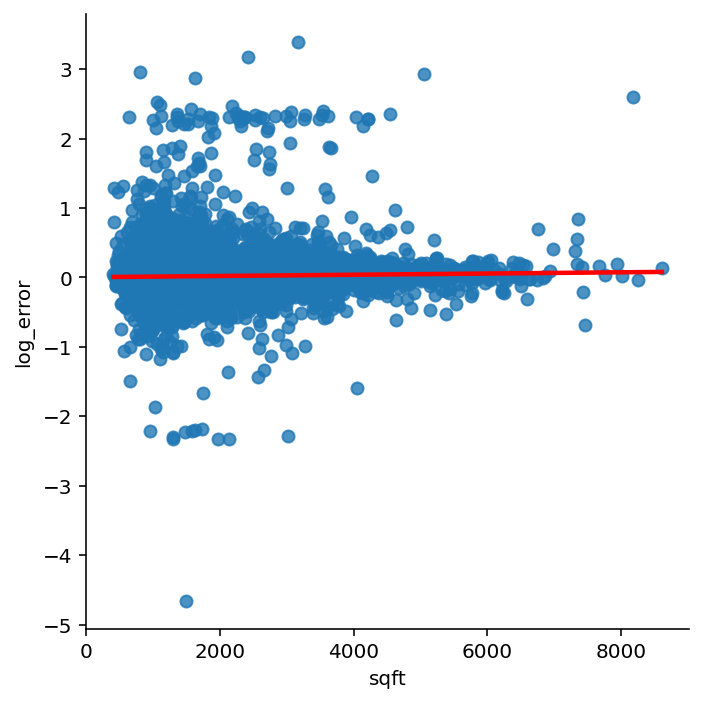

In [10]:
sns.lmplot(x='sqft', y='log_error', data=train, line_kws={'color': 'red'})
plt.show()

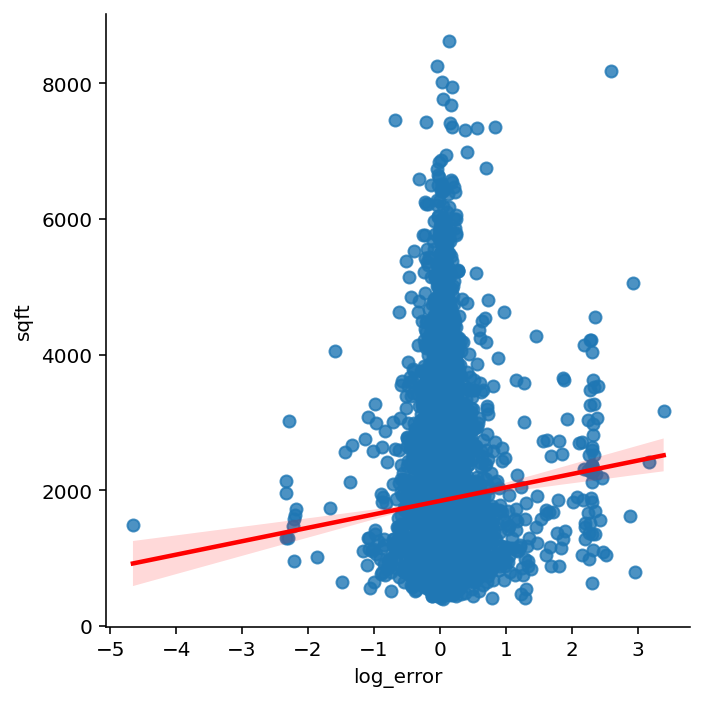

In [11]:
sns.lmplot(y='sqft', x='log_error', data=train, line_kws={'color': 'red'})
plt.show()

## Test Hypothesis

# Pearson's R
**Compute test statistic and probability (r & p_value)**

In [12]:
wz.pearson_r(train, 'sqft', 'log_error')

Reject the null hypothesis
_____________________
correlation 0.0418
p-value 0.0


<div class="alert alert-info">
    
## Q1
## YES
There is a significant ```relationship``` between sqft and log_error  

<div class="alert alert-warning">


## Q2
## Is there a relationship between lot_sqft our target feature of Zillow Zestimate log_error? 

 **Set Hypothesis**  
  
 * One Tail (```<= | >```) or Two Tails (```== | !=```)?\  
  **two_tail (lot_sqft, log_error)**  
  
  
 * One Sample or Two Samples?\  
  **two_sample (lot_sqft, log_error)**  
  
  
 * Continuous or Discreat?\  
  **Continuous (lot_sqft) vs Continuous (log_error) = Pearson’s**  
      * T-Test = ```Discreat``` vs ```Continuous```  
      * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)  
      * $Chi^2$ = ```Discreat``` vs ```Discreat```  
  
  
 * $𝐻_0$: The opposite of what I am trying to prove  
 * $H_{0}$:  There is **NOT** a significant ```relationship``` between lot_sqft and log_error  
  ```lot_sqft``` != ```log_error```  
  
  
 * $𝐻_𝑎$: What am I trying to prove  
 * $H_{a}$: There is a significant ```relationship``` between lot_sqft and log_error  
  ```lot_sqft``` == ```log_error``` 

## Visualization

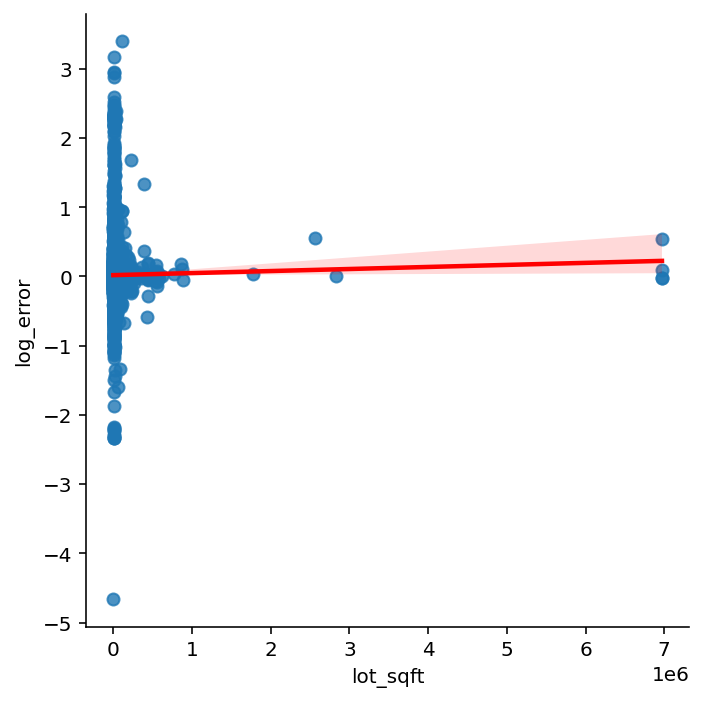

In [13]:
sns.lmplot(x='lot_sqft', y='log_error', data=train, line_kws={'color': 'red'})
plt.show()

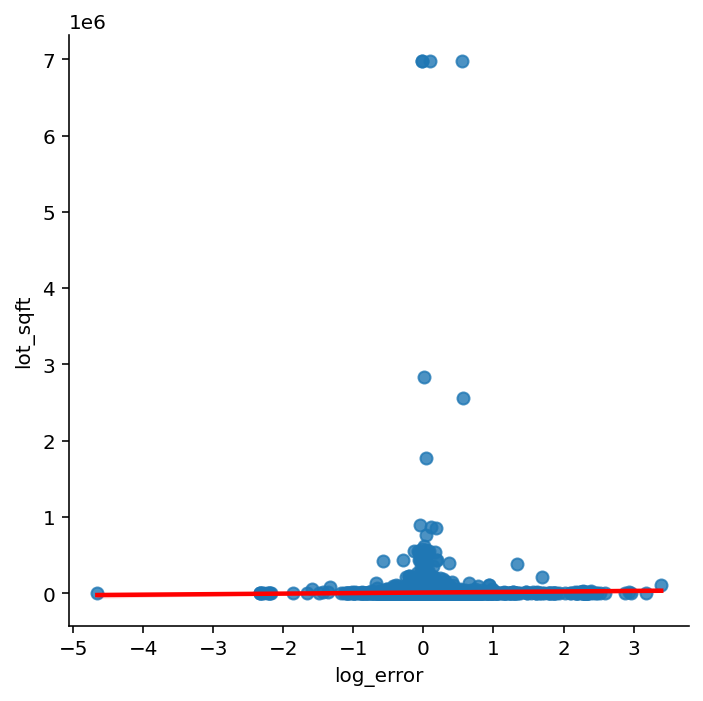

In [14]:
sns.lmplot(y='lot_sqft', x='log_error', data=train, line_kws={'color': 'red'})
plt.show()

## Test Hypothesis

# Pearson's R
**Compute test statistic and probability (r & p_value)**

In [15]:
wz.pearson_r(train, 'lot_sqft', 'log_error')

Reject the null hypothesis
_____________________
correlation 0.0144
p-value 0.0125


<div class="alert alert-info">
    
## Q2
## YES
There is a significant ```relationship``` between lot_sqft and log_error  

<div class="alert alert-warning">


## Q3
## Is there a relationship between tax_value our target feature of Zillow Zestimate log_error? 

 **Set Hypothesis**  
  
 * One Tail (```<= | >```) or Two Tails (```== | !=```)?\  
  **two_tail (tax_value, log_error)**  
  
  
 * One Sample or Two Samples?\  
  **two_sample (tax_value, log_error)**  
  
  
 * Continuous or Discreat?\  
  **Continuous (tax_value) vs Continuous (log_error) = Pearson’s**  
      * T-Test = ```Discreat``` vs ```Continuous```  
      * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)  
      * $Chi^2$ = ```Discreat``` vs ```Discreat```  
  
  
 * $𝐻_0$: The opposite of what I am trying to prove  
 * $H_{0}$:  There is **NOT** a significant ```relationship``` between tax_value and log_error  
  ```tax_value``` != ```log_error```  
  
  
 * $𝐻_𝑎$: What am I trying to prove  
 * $H_{a}$: There is a significant ```relationship``` between tax_value and log_error  
  ```tax_value``` == ```log_error``` 

## Visualization

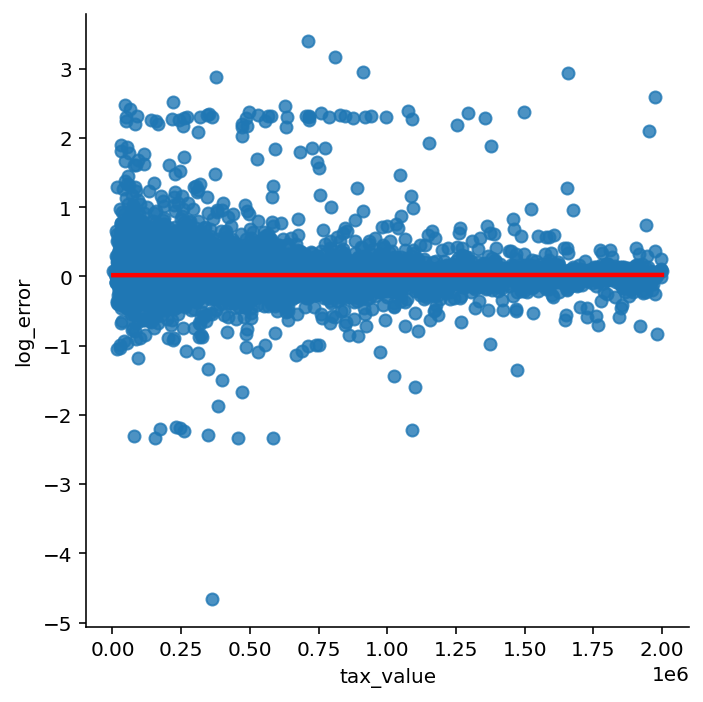

In [16]:
sns.lmplot(x='tax_value', y='log_error', data=train, line_kws={'color': 'red'})
plt.show()

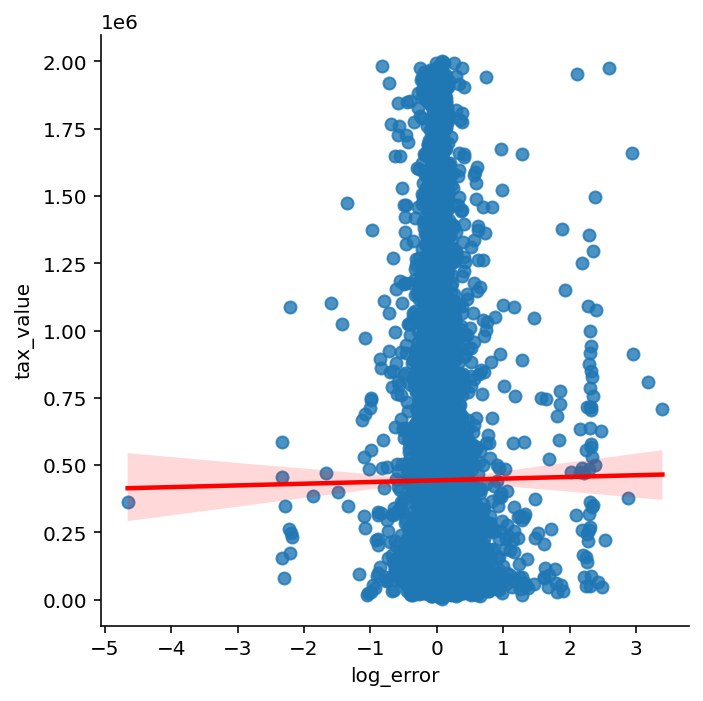

In [17]:
sns.lmplot(y='tax_value', x='log_error', data=train, line_kws={'color': 'red'})
plt.show()

## Test Hypothesis

# Pearson's R
**Compute test statistic and probability (r & p_value)**

In [18]:
wz.pearson_r(train, 'tax_value', 'log_error')

Fail to reject the null hypothesis
_____________________
correlation 0.0032
p-value 0.5825


<div class="alert alert-info">
    
## Q3
## NO
There is **NOT** a significant ```relationship``` between tax_value and log_error  

# Cluster

In [19]:
def k_cluster(df, cluster_features, column_name, n_clusters):
    """
    """
    kmeans = KMeans(n_clusters = n_clusters, random_state=1992)
    kmeans.fit(cluster_features)
    kmeans.predict(cluster_features)
    
    # Write it into the DataFrame
    df[column_name] = kmeans.predict(cluster_features)
    
    # Create seperate catagorical features for each cluster 
    temp = pd.get_dummies(df[column_name], drop_first=False).rename(columns=lambda x:f'{column_name}_'+str(x))
    df = pd.concat([df, temp],axis=1)
    
    return df

# I can't get this to write and stick to train outside of the function
#prefix=['col1', 'col2'])

In [20]:
def create_cluster (X_cluster_name, train, validate, test, feature_columns, n_clusters=3):
    ''' create_cluster takes in 
        X_cluster_name: name of cluster
        train: train data
        validate: validate data
        test: test data
        feature_columns: column list of features for clustering and scaling
        cluster: default to 3 number of desired clusters
        
        *scales using scaled_data minmaxscaler()
        *fits cluster into train_scaled data
        *creates new column for cluster in train, validate and test
        
        returns train, validate ,test, train_scaled, validate_scaled, test_scaled
        '''
    # name the cluster
    name= X_cluster_name

    # scaled the data
    columns_to_scale = feature_columns
    train_scaled, validate_scaled, test_scaled = wz.scale_data(train,
                                                               validate, 
                                                               test, 
                                                               columns_to_scale,
                                                               MinMaxScaler())

    # fit in to train and create cluster
    X_cluster_name = train_scaled[feature_columns]
    kmeans = KMeans(n_clusters=n_clusters, random_state = 1992)
    kmeans.fit(X_cluster_name)

    # save into train_scaled and train
    train_scaled[str(name) ] = kmeans.predict(X_cluster_name)
    train[str(name)]=kmeans.predict(X_cluster_name)
    
    # Create seperate catagorical features for each cluster in train
    temp = pd.get_dummies(train[name], drop_first=False).rename(columns=lambda x:f'{name}_'+str(x))
    train = pd.concat([train, temp],axis=1)
    
    # Create seperate catagorical features for each cluster in train_scaled
    temp = pd.get_dummies(train_scaled[name], drop_first=False).rename(columns=lambda x:f'{name}_'+str(x))
    train_scaled = pd.concat([train_scaled, temp],axis=1)
    
    # save cluster in to validate_scaled and validate
    X_cluster_name = validate_scaled[feature_columns]
    validate_scaled[str(name) ] = kmeans.predict(X_cluster_name)
    validate[str(name)]=kmeans.predict(X_cluster_name)
    
    # Create seperate catagorical features for each cluster in train
    temp = pd.get_dummies(validate[name], drop_first=False).rename(columns=lambda x:f'{name}_'+str(x))
    validate = pd.concat([validate, temp],axis=1)
    
    # Create seperate catagorical features for each cluster in train_scaled
    temp = pd.get_dummies(validate_scaled[name], drop_first=False).rename(columns=lambda x:f'{name}_'+str(x))
    validate_scaled = pd.concat([validate_scaled, temp],axis=1)
    
    # save cluser into test_scaled and test
    X_cluster_name = test_scaled[feature_columns]
    test_scaled[str(name) ] = kmeans.predict(X_cluster_name)
    test[str(name)]=kmeans.predict(X_cluster_name)
    
    # Create seperate catagorical features for each cluster in train
    temp = pd.get_dummies(test[name], drop_first=False).rename(columns=lambda x:f'{name}_'+str(x))
    test = pd.concat([test, temp],axis=1)
    
    # Create seperate catagorical features for each cluster in train_scaled
    temp = pd.get_dummies(test_scaled[name], drop_first=False).rename(columns=lambda x:f'{name}_'+str(x))
    test_scaled = pd.concat([test_scaled, temp],axis=1)
    

    return train, validate, test, train_scaled, validate_scaled, test_scaled



In [21]:
def column_stats(df, column_name):
    """
    """
    
    # Shows non-duplicate Value Count of Column
    print(f'There are {df[column_name].drop_duplicates().shape[0]} Non-duplicate values.')
    
    # Shows Null Value Count of Column
    print(f'There are {df[column_name].isnull().sum()} Null values.')
    
    # Calculate count of Whitespace
    row_count = df[column_name].shape[0]
    row_value_count = df[column_name].value_counts().sum()
    whitespace_count = row_count - row_value_count
    print (f'There are {whitespace_count} Whitespace characters.')
    print()
    
    # Shows Unique Value Count of Column
    print(f'There are {df[column_name].nunique()} Unique values.')
    print()
    
    # Shows Unique Values of Column
    print(f'These are the Unique Values: {df[column_name].unique()}')
    print()
    
    # Shows Unique Values of Column with Count of occurances
    print(f'These are the Unique Value Counts:\n{df[column_name].value_counts()}')

In [22]:
column_stats(df, 'longitude')

There are 48887 Non-duplicate values.
There are 0 Null values.
There are 0 Whitespace characters.

There are 48887 Unique values.

These are the Unique Values: [-1.17869207e+08 -1.19281531e+08 -1.17823170e+08 ... -1.18706327e+08
 -1.18038169e+08 -1.17996709e+08]

These are the Unique Value Counts:
-117835000.0    7
-118172000.0    7
-118251000.0    5
-117874000.0    5
-118183000.0    5
               ..
-117834737.0    1
-118659512.0    1
-118132169.0    1
-117744674.0    1
-117996709.0    1
Name: longitude, Length: 48887, dtype: int64


In [23]:
train_scaled.longitude.dtype

dtype('float64')

In [24]:
feature_columns = ['longitude', 'latitude']
X_cluster_name = 'location_cluster'
n_clusters = 4

train, validate, test, train_scaled, validate_scaled, test_scaled = create_cluster (X_cluster_name, train, validate, test, feature_columns, n_clusters)

In [25]:
feature_columns = ['sqft', 'lot_sqft']
X_cluster_name = 'size_cluster'
n_clusters = 4

train, validate, test, train_scaled, validate_scaled, test_scaled = create_cluster (X_cluster_name, train, validate, test, feature_columns, n_clusters)

In [26]:
feature_columns = ['tax_value', 'tax_value_land']
X_cluster_name = 'tax_cluster'
n_clusters = 4

train, validate, test, train_scaled, validate_scaled, test_scaled = create_cluster (X_cluster_name, train, validate, test, feature_columns, n_clusters)

In [27]:
train.T

,0,1,2,3,4,5,6,7,8,9,...,30165,30166,30167,30168,30169,30170,30171,30172,30173,30174
parcelid,12718148,11445758,14316919,17096262,14412505,11826552,14390000,12517409,12319359,14258428,...,14219686,11873535,10995778,14370036,11185410,10859264,10912846,11517205,14305937,12203604
bedrooms,3.0,3.0,2.0,3.0,3.0,3.0,5.0,3.0,2.0,2.0,...,3.0,3.0,2.0,4.0,5.0,3.0,3.0,3.0,6.0,3.0
bathrooms,1.0,2.0,1.0,1.0,2.5,1.0,5.5,2.0,2.0,1.0,...,3.5,1.0,1.0,3.0,3.0,3.0,3.0,2.0,4.0,1.0
calculatedbathnbr,1.0,2.0,1.0,1.0,2.5,1.0,5.5,2.0,2.0,1.0,...,3.5,1.0,1.0,3.0,3.0,3.0,3.0,2.0,4.0,1.0
fullbathcnt,1.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,2.0,1.0,...,3.0,1.0,1.0,3.0,3.0,3.0,3.0,2.0,4.0,1.0
age,64.0,66.0,54.0,65.0,28.0,92.0,35.0,64.0,77.0,79.0,...,45.0,63.0,77.0,30.0,18.0,78.0,79.0,63.0,41.0,78.0
yearbuilt,1953.0,1951.0,1963.0,1952.0,1989.0,1925.0,1982.0,1953.0,1940.0,1938.0,...,1972.0,1954.0,1940.0,1987.0,1999.0,1939.0,1938.0,1954.0,1976.0,1939.0
has_basement,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
has_deck,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
has_fireplace,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<div class="alert alert-warning">


## Q4
## Is there a relationship between location_cluster and our target feature of Zillow Zestimate log_error? 

 **Set Hypothesis**  
  
 * One Tail (```<= | >```) or Two Tails (```== | !=```)?\  
  **two_tail (location_cluster, log_error)**  
  
  
 * One Sample or Two Samples?\  
  **two_sample (location_cluster, log_error)**  
  
  
 * Continuous or Discreat?\  
  **Discreate (location_cluster) vs Continuous (log_error) = T-Test**  
      * T-Test = ```Discreat``` vs ```Continuous```  
      * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)  
      * $Chi^2$ = ```Discreat``` vs ```Discreat```  
  
  
 * $𝐻_0$: The opposite of what I am trying to prove  
 * $H_{0}$:  There is **NOT** a significant ```relationship``` between location_cluster and log_error  
  ```location_cluster``` != ```log_error```  
  
  
 * $𝐻_𝑎$: What am I trying to prove  
 * $H_{a}$: There is a significant ```relationship``` between location_cluster and log_error  
  ```location_cluster``` == ```log_error``` 

## Visualization

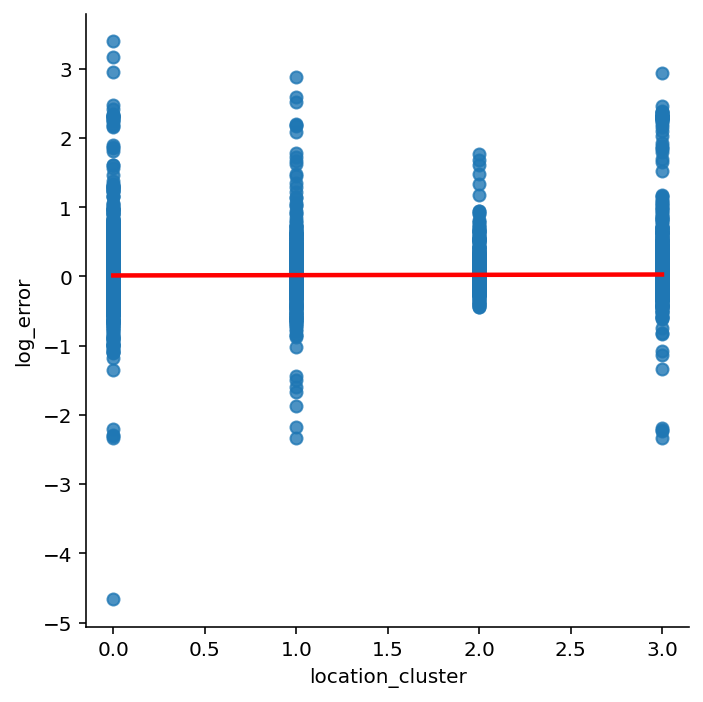

In [28]:
sns.lmplot(x='location_cluster', y='log_error', data=train, line_kws={'color': 'red'})
plt.show()

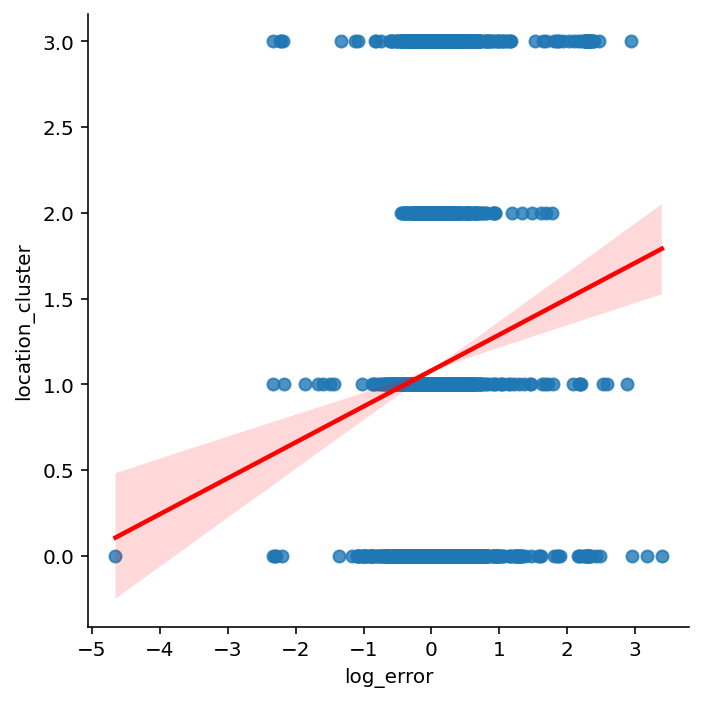

In [29]:
sns.lmplot(y='location_cluster', x='log_error', data=train, line_kws={'color': 'red'})
plt.show()

## Test Hypothesis

# T-Test
**Compute test statistic and probability (t-statistic & p-value)**

In [30]:
def ttest(df, discreat_feature, continuous_feature, tail):
    """
    
    """
    
    t_stat, p_val = stats.levene(df[discreat_feature], df[continuous_feature])
    α = 0.05
    
    if p_val < α:
        print('equal_var = False (we cannot assume equal variance)')
        #Using Scipy 
        t_stat, p_val = stats.ttest_ind(df[discreat_feature], df[continuous_feature], equal_var = False)
        print(f't-stat: {t_stat}')
        print(f'p-value: {p_val}')
    else:
        print('equal_var = True (we will assume equal variance)')
        #Using Scipy 
        t_stat, p_val = stats.ttest_ind(df[discreat_feature], df[continuous_feature], equal_var = True)
        print(f't-stat: {t_stat}')
        print(f'p-value: {p_val}')
        
    print()
    # one_tail
    if tail == 1:
        if (t_stat > 0) and ((p_val / 2) < α):
            print('We can reject the one_tail null hypothesis')
        else:
            print('we fail to reject the one_tail null hypothesis')
    
    # two_tail
    if tail == 2:
        if p_val < α:
            print('We can reject the two_tail null hypothesis')
        else:
            print('we fail to reject the two_tail null hypothesis')

In [31]:
ttest(train_scaled, 'location_cluster', 'log_error', 2)

equal_var = False (we cannot assume equal variance)
t-stat: 151.99953700450283
p-value: 0.0

We can reject the two_tail null hypothesis


<div class="alert alert-info">
    
## Q4
## YES
There is a significant ```relationship``` between location_cluster and log_error  

<div class="alert alert-warning">


## Q5
## Is there a relationship between tax_cluster and our target feature of Zillow Zestimate log_error? 

 **Set Hypothesis**  
  
 * One Tail (```<= | >```) or Two Tails (```== | !=```)?\  
  **two_tail (tax_cluster, log_error)**  
  
  
 * One Sample or Two Samples?\  
  **two_sample (tax_cluster, log_error)**  
  
  
 * Continuous or Discreat?\  
  **Discreate (tax_cluster) vs Continuous (log_error) = T-Test**  
      * T-Test = ```Discreat``` vs ```Continuous```  
      * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)  
      * $Chi^2$ = ```Discreat``` vs ```Discreat```  
  
  
 * $𝐻_0$: The opposite of what I am trying to prove  
 * $H_{0}$:  There is **NOT** a significant ```relationship``` between tax_cluster and log_error  
  ```tax_cluster``` != ```log_error```  
  
  
 * $𝐻_𝑎$: What am I trying to prove  
 * $H_{a}$: There is a significant ```relationship``` between tax_cluster and log_error  
  ```tax_cluster``` == ```log_error``` 

## Visualization

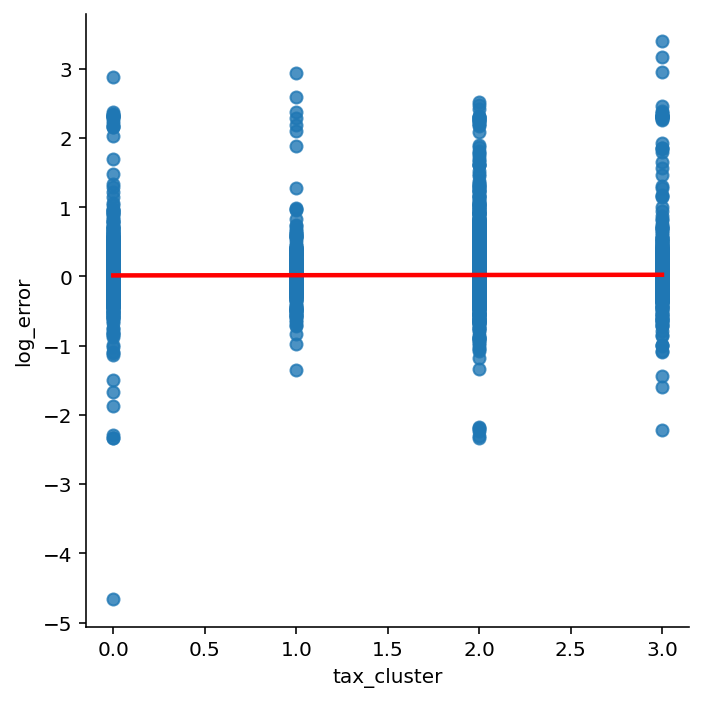

In [32]:
sns.lmplot(x='tax_cluster', y='log_error', data=train, line_kws={'color': 'red'})
plt.show()

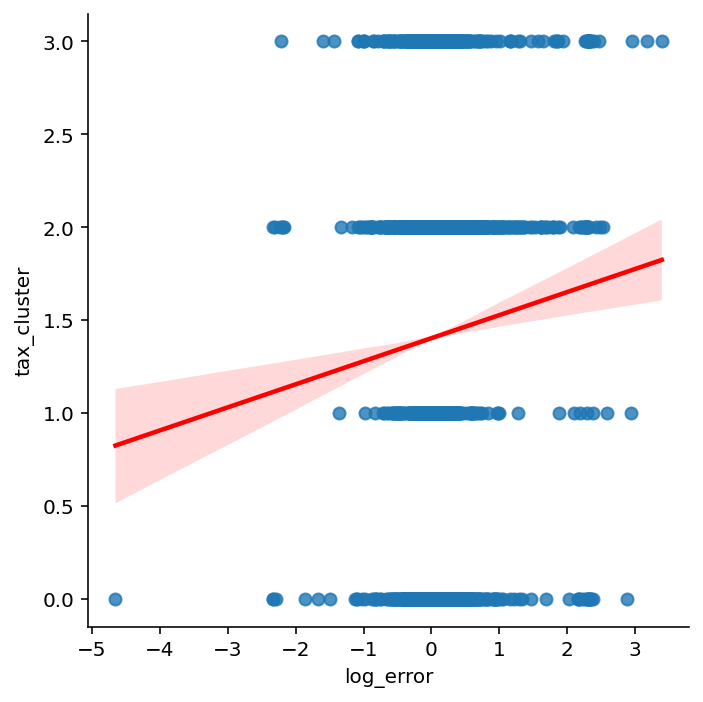

In [33]:
sns.lmplot(y='tax_cluster', x='log_error', data=train, line_kws={'color': 'red'})
plt.show()

## Test Hypothesis

# T-Test
**Compute test statistic and probability (t-statistic & p-value)**

In [34]:
ttest(train_scaled, 'tax_cluster', 'log_error', 2)

equal_var = False (we cannot assume equal variance)
t-stat: 211.84355534348154
p-value: 0.0

We can reject the two_tail null hypothesis


<div class="alert alert-info">
    
## Q5
## YES
There is a significant ```relationship``` between tax_cluster and log_error  

<div class="alert alert-danger">


## Bonus:

Compute the ```mean(logerror)``` by **zipcode** and the **overall** ```mean(logerror)```. Write a loop that will run a **t-test** between the **overall** mean and the mean for each **zip code**. We want to identify the zip codes where the error is significantly higher or lower than the expected error.